# Рынок заведений общественного питания Москвы

1.[Знакомство с данными](#data_info)  
    1.1 [Загрузка данных](#data_download)  
    1.2 [Составление профиля данных](#profiling)     
2.[Анализ данныз](#data_analysis)   
    2.1 [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#three-one)  
    2.2 [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график](#three-two)  
    2.3 [Для какого вида объекта общественного питания характерно сетевое распространение?](#tree-three)  
    2.4 [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#three-four)  
    2.5 [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#three-five)  
    2.6 [Выделите в отдельный столбец информацию об улице из столбца address](#three-six)  
    2.7 [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#three-seven)    
    2.8 [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#three-eight)  
    2.9 [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#three-nine)   
3.[Общий вывод](#Conclusion)
    


In [562]:
import pandas as pd 
pd.options.display.float_format = '{:,.0f}'.format
import datetime as dt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px 

import numpy as np
import geopandas as gpd
from shapely.geometry import Point

import requests
import re
from bs4 import BeautifulSoup


In [ ]:
 # Если pandasProfiling вызывает ошибку
 # pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


<a id="data_info"></a>
## 1. Знакомство с данными


<a id='data_download'></a>
### 1.1 Загрузка данных

In [563]:
try:
    data = pd.read_csv('/Users/ulia/Downloads/rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')

In [564]:
print(data.head())
print()
print(data.info())

       id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        

In [565]:
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания','фастфуд').replace('магазин (отдел кулинарии)','кулинария')

In [566]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'фастфуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

<a id='profiling'></a>
### 1.2 Составление профиля данных

In [567]:
ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


### Дубликатов и пропусков нет, тип данных указан верно

<a id="data_analysis"></a>
## 2. Анализ данных

<a id="three-one"></a>
### 2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

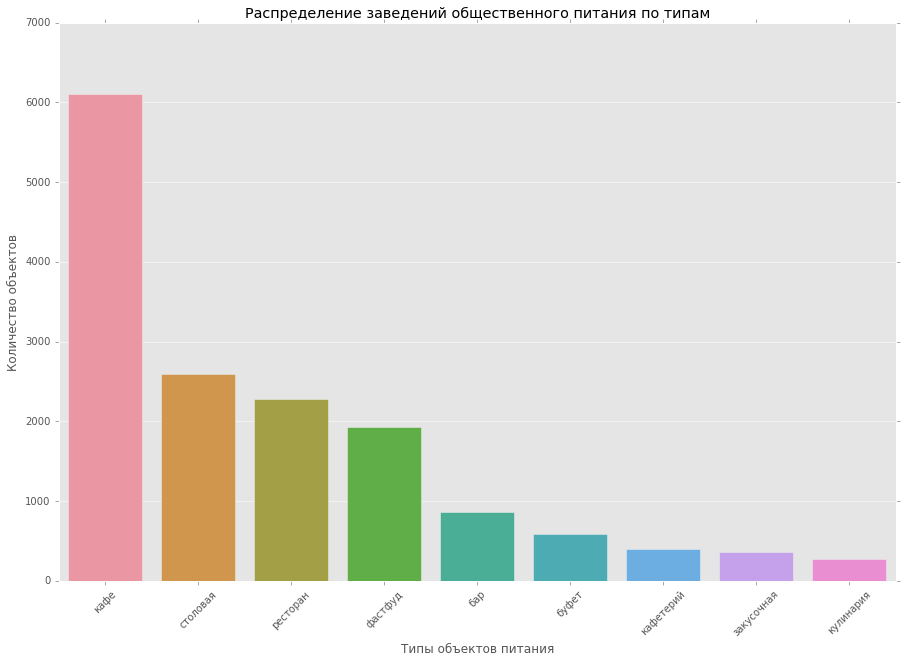

In [568]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
sns.barplot(x='object_type',y='count', data = data.groupby('object_type',as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'count'})\
    .sort_values(by='count', ascending=False))
plt.title('Распределение заведений общественного питания по типам')
plt.xlabel("Типы объектов питания")
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.show()

### Как видно из графика, больше всего кафе, столовых и ресторанов, а меньше всего отделов кулинарии в магазинах

<a id="three-two"></a>
### 2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график

Text(0.5, 1.0, 'Распределение сетевых и несетевых заведений в Москве')

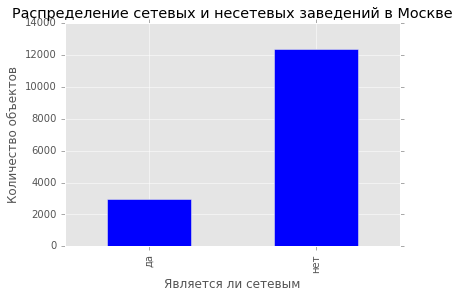

In [608]:
ax = data.groupby('chain').agg({'id':'count'}).plot(kind='bar', color='blue')
plt.style.use('seaborn-muted')
plt.xlabel('Является ли сетевым')
plt.ylabel('Количество объектов')
ax.get_legend().remove()
plt.title('Распределение сетевых и несетевых заведений в Москве')

### В Москве в 4 раза меньше сетевых завведений.

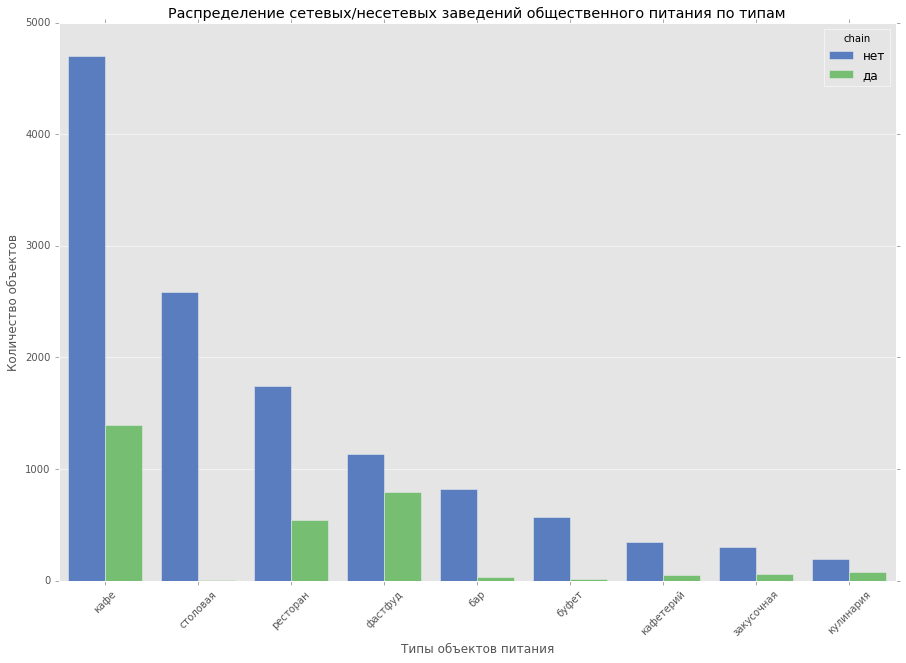

In [570]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
sns.barplot(x='object_type',y='count', data=data.groupby(['object_type','chain'],as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'count'})\
    .sort_values(by='count', ascending=False), hue='chain')
plt.title('Распределение сетевых/несетевых заведений общественного питания по типам')
plt.xlabel('Типы объектов питания')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.show()

### Видим, что во всем типам объектом превалируют несетевые объекты. Почти нет сетевых столовых.

<a id='three-three'></a>
### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?

In [571]:
data_grouped = data.groupby(['object_type','chain'],as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'count'})\
    .sort_values(by='count', ascending=False)
data_grouped_chain = data_grouped.query('chain=="да"')
data_grouped_no_chain = data_grouped.query('chain=="нет"')


In [572]:
merged_chain = data_grouped_chain.merge(data_grouped_no_chain, on='object_type',suffixes=('_chain','_no_chain'))[['object_type','count_chain','count_no_chain']]

<Figure size 1440x1080 with 0 Axes>

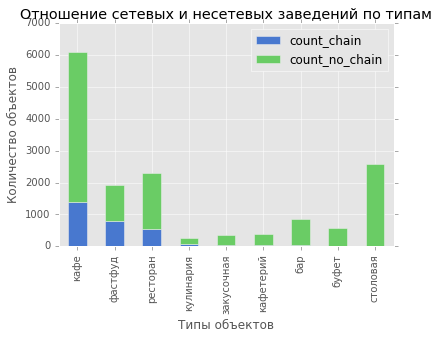

In [573]:
plt.figure(figsize=(20,15))
plt.style.use('seaborn-muted')
merged_chain.set_index('object_type').plot(kind='bar',stacked=True)
plt.xlabel('Типы объектов')
plt.ylabel('Количество объектов')
plt.title('Отношение сетевых и несетевых заведений по типам')
plt.show()


### Самый большой процент сетевых объектов в предприятиях быстрого обслуживания

<a id='three-four'></a>
### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [574]:
fig = px.histogram(data.query('chain=="да"'), x="number",  labels={
                     "number": "Количество посадочных мест"
                 },
                title="Распределение посадочных мест в сетевых заведениях Москвы")
fig.update_annotations(title='Распределение')

In [609]:
fig = px.box(data.query('chain=="да"'), x="number", labels={'number':'кол-во посадочных мест'})
fig.show()

In [605]:
def groups(number):
    if number < 40:
        return 'до 40 мест'
    elif (number>=40 and number< 75):
        return 'от 40 до 75 мест'
    elif (number >=75 and number< 150):
        return 'от 75 до 150 мест'
    else:
        return 'более 150 мест'

In [604]:
data['group'] = data['number'].apply(groups)

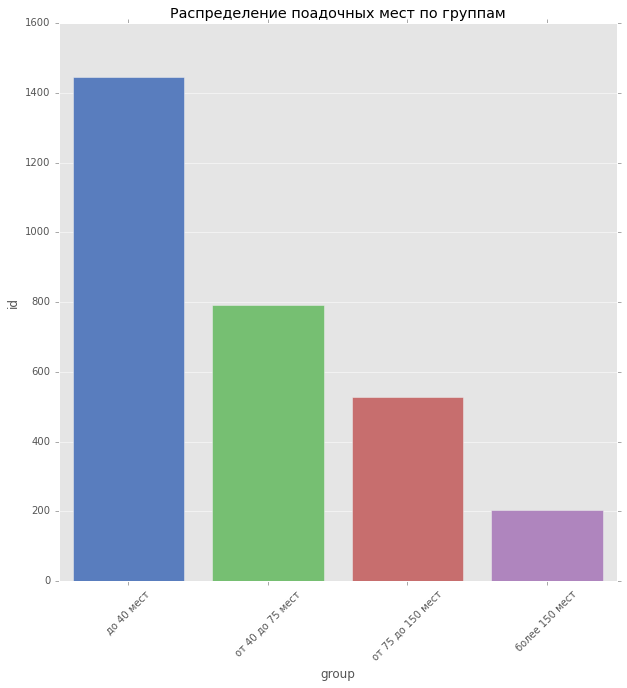

In [610]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-muted')
sns.barplot(x='group', y='id',data=data.query('chain=="да"').groupby('group',as_index=False)\
    .agg({'id':'count'}), order = ['до 40 мест','от 40 до 75 мест','от 75 до 150 мест','более 150 мест'])
plt.title('Распределение поадочных мест по группам')
plt.xticks(rotation=45)
plt.show()


### Среди сетевых заведений медианное значинеие - 40 мест, преобладают небольшие заведения

<a id='three-five'></a>
### 2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [579]:
data.groupby('object_type',as_index=False).agg({'number':'mean'}).sort_values(by='number',ascending=False)

,object_type,number
7,столовая,130
6,ресторан,97
1,буфет,51
0,бар,43
3,кафе,40
8,фастфуд,21
4,кафетерий,9
2,закусочная,8
5,кулинария,6


In [580]:
fig = px.bar(data.groupby('object_type',as_index=False).agg({'number':'mean'})\
    .sort_values(by='number',ascending=False), y='number', x='object_type', title='Среднее количество посадочных мест', 
    labels={'object_type':'Тип объекта', 'number':'Среднее кол-во посадочных мест'})
fig.show()

### Самое большое количество посадочных мест в среднем в столовых - 130, ресторанах - 97 и буфетах - 51

<a id='three-six'></a>
### 2.6 Выделите в отдельный столбец информацию об улице из столбца address

In [581]:
words = ['улица','переулок','шоссе','проспект','тупик','поселение','бульвар']
def streets(address):
    add_list = address.split(',')
    for word in words:
        for lst in add_list:
            if word in lst:
                return lst


In [582]:
data['streets'] = data['address'].apply(streets)

<a id='three-seven'></a>
### 2.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [612]:
many_objects = data.groupby('streets',as_index=False).agg({'id':'count'})\
.sort_values(by='id', ascending=False)\
.rename(columns={'id':'obj_number'})\
.head(10)\
.reset_index(drop=True)
many_objects.head(10)

,streets,obj_number
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Варшавское шоссе,164
4,Ленинский проспект,147
5,проспект Вернадского,132
6,Кутузовский проспект,114
7,Каширское шоссе,112
8,Кировоградская улица,110
9,Ходынский бульвар,102


Проспект мира, Пресненская набережная, Кутузовский проспект находятся в центре Москвы,  
Проспект Вернадского и Ленинский проспект - на Юго-Западе  
Варшавское и Кашироское шоссе на Юго-Востоке  
поселение Сосенское - это Новая Москва, Коммунарка  
Надо сказать, что практически все улицы, попавшие в этот список  - очень протяженные проспекты, с огромной проходимостью

<a id='three-eight'></a>
### 2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [584]:
num_obj = data.groupby('streets',as_index=False)\
    .agg({'id':'count'})\
    .sort_values(by='id', ascending=False)

In [585]:
one_object = num_obj.query('id==1')['streets'].unique().tolist()

In [586]:
for word in words:
    print(word)

улица
переулок
шоссе
проспект
тупик
поселение
бульвар


In [587]:
one_object_lst = [obj.replace('переулок'," ")\
    .replace('улица','').replace('шоссе','')
    .replace('проспект','')\
    .replace('тупик','')\
    .replace('поселение','')\
    .replace('бульвар','').strip() for obj in one_object]

In [588]:
one_object_lst

['Фрезер',
 '5-й Котельнический',
 'Сосенское',
 'Митинская',
 'Обручева',
 'Алтуфьевское',
 'Миклухо-Маклая',
 'Знаменка',
 'Каманина',
 'Нижний Таганский',
 'Земляной Вал',
 'Погодинская',
 '1-я Тверская-Ямская',
 'Энгельса',
 'Таганская',
 'Полевая',
 'Школьная',
 'Вспольный',
 'Жебрунова',
 'Дербеневская',
 'Варшавское',
 'Тушинская',
 'Садовая-Сухаревская',
 'Калашный',
 'Киевская',
 'Чертановская',
 'Коровинское',
 'Шарикоподшипниковская',
 'Краснобогатырская',
 'Михайлово-Ярцевское',
 'Жуковского',
 'Большая Серпуховская',
 'Евгения Родионова',
 'Профсоюзная',
 'Ленинский',
 '"Мосрентген"',
 'Большая Бронная',
 'Вознесенский',
 'Марушкинское',
 'Медынская',
 'Поречная',
 'Екатерины Будановой',
 'Кухмистерова',
 'Щорса',
 'Кошкина',
 'Пивченкова',
 'Клочкова',
 'Паперника',
 'Павла Андреева',
 'Новая Дорога',
 'Николаева',
 'Никитина',
 'Немчинова',
 'Недорубова',
 'Константинова',
 'Корнея Чуковского',
 'Можайский Вал',
 'Медиков',
 'Медведева',
 'Полины Осипенко',
 'Маршала Нов

### Получим данные из онлайн базы данных всех улиц Москвы:
[Все улицы Москвы](http://xn----7sbbj7ab0abgod6a9h.xn--80adxhks/%D0%B2%D1%81%D0%B5_%D1%83%D0%BB%D0%B8%D1%86%D1%8B_%D0%BC%D0%BE%D1%81%D0%BA%D0%B2%D1%8B)

In [589]:
content_many = []
for page in range(1,310):
    URL = 'http://xn----7sbbj7ab0abgod6a9h.xn--80adxhks/%D0%B2%D1%81%D0%B5_%D1%83%D0%BB%D0%B8%D1%86%D1%8B_%D0%BC%D0%BE%D1%81%D0%BA%D0%B2%D1%8B' + '?page='+str(page)
    req = requests.get(URL)
    soup = BeautifulSoup(req.text, 'lxml')
    table = soup.find('table', attrs={'class':'table table-striped table-bordered'})
    for row in table.find_all('tr'):
        if not row.find_all('th'): 
            content_many.append([element.text for element in row.find_all('td')])

In [590]:
URL = 'http://xn----7sbbj7ab0abgod6a9h.xn--80adxhks/%D0%B2%D1%81%D0%B5_%D1%83%D0%BB%D0%B8%D1%86%D1%8B_%D0%BC%D0%BE%D1%81%D0%BA%D0%B2%D1%8B' + '?page='+str(page)
req0 = requests.get(URL)
soup0 = BeautifulSoup(req.text, 'lxml')
table0 = soup.find('table', attrs={'class':'table table-striped table-bordered'})
heading_table = []
for row in table0.find_all('th'):
    heading_table.append(row.text)
content0 = []
for row in table0.find_all('tr'):
    if not row.find_all('th'): 
        content0.append([element.text for element in row.find_all('td')])

In [591]:
content_many.extend(content0)

In [592]:
regions = pd.DataFrame(content_many, columns=heading_table) 

In [593]:
regions.head()

,Наименование,Тип,Индекс,Административный округ,Район
0,,,,,
1,1,мкр,142793,Новомосковский административный округ,Десёновское поселение
2,1 Маевки,аллея,111395,Восточный административный округ,район Вешняки
3,1 Мая,ул,124365,Зеленоградский административный округ,район Крюково
4,1-й,мкр,142784,Новомосковский административный округ,Внуковское поселение


In [594]:
vocab = {'ул':'улица', 'пл':'площадь','б-р':'бульвар'}
for key,value in vocab.items():
    regions['Тип'] = regions['Тип'].str.replace(key,value)


In [595]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Наименование            6508 non-null   object
 1   Тип                     6508 non-null   object
 2   Индекс                  6508 non-null   object
 3   Административный округ  6508 non-null   object
 4   Район                   6508 non-null   object
dtypes: object(5)
memory usage: 254.3+ KB


In [596]:
regions_one_object = regions[regions['Наименование'].isin(one_object_lst)]

In [597]:
regions_one_object

,Наименование,Тип,Индекс,Административный округ,Район
11,1-й Балтийский,пер,125315,Северный административный округ,район Аэропорт
12,1-й Басманный,пер,,Центральный административный округ,Красносельский район
28,1-й Голутвинский,пер,119180,Центральный административный округ,район Якиманка
38,1-й Заречный,пер,142191,Троицкий административный округ,поселение Троицк
39,1-й Зачатьевский,пер,119034,Центральный административный округ,район Хамовники
...,...,...,...,...,...
6482,Яузский,бульвар,109028,Центральный административный округ,Таганский район
6483,Яхромская,улица,127411,Северный административный округ,Дмитровский район
6495,Ясногорская,улица,,Юго-Западный административный округ,район Ясенево
6502,Яузский,бульвар,109028,Центральный административный округ,Таганский район


In [613]:
regions_one_object.groupby('Район',as_index=False)\
    .agg({'Наименование':'count'})\
    .sort_values(by='Наименование',ascending=False)\
    .rename(columns={'Наименование':'streets_num', 'Район':'region'}).head(10).reset_index(drop=True)

,region,streets_num
0,Таганский район,27
1,Пресненский район,26
2,Басманный район,23
3,район Хамовники,23
4,Внуковское поселение,22
5,Первомайское поселение,21
6,Тверской район,19
7,Краснопахорское поселение,16
8,Марушкинское поселение,16
9,Мещанский район,15


In [614]:
regions_one_object.groupby('Административный округ',as_index=False)\
    .agg({'Наименование':'count'})\
    .sort_values(by='Наименование',ascending=False)\
    .rename(columns={'Наименование':'streets_num', 'Административный округ':'district'}).head(10)\
    .reset_index(drop=True)

,district,streets_num
0,Центральный административный округ,175
1,Новомосковский административный округ,83
2,Троицкий административный округ,74
3,Восточный административный округ,48
4,Северный административный округ,48
5,Северо-Восточный административный округ,40
6,Западный административный округ,39
7,Юго-Восточный административный округ,38
8,Юго-Западный административный округ,29
9,Южный административный округ,24


Удалось найти 621 улицу с одним заведением общепита  
Большинство таких улиц - в Таганском, Пресненском и Басманном, Хамовническом районах и в поселениях  
Причина скорее всего кроется в невероятно высокой стоимости аренды в центре города  
По округам - лидирует Центральный административный округ и Новая Москва  


<a id='three-nine'></a>
### 2.9 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.   
Какие закономерности можно выявить?

In [600]:
many_obj_data = data[data['streets'].isin(many_objects['streets'].tolist())]
many_obj_data.head()

,id,object_name,chain,object_type,address,number,group,streets
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,<bound method Series.apply of 0 48\n1 ...,Варшавское шоссе
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,<bound method Series.apply of 0 48\n1 ...,Варшавское шоссе
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,<bound method Series.apply of 0 48\n1 ...,Варшавское шоссе
154,152556,Шаурма в пите,нет,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,<bound method Series.apply of 0 48\n1 ...,Варшавское шоссе
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,<bound method Series.apply of 0 48\n1 ...,Варшавское шоссе


In [601]:
fig = px.histogram(many_obj_data, x='number',labels={'number':'количество посадочных мест'},
title='Распределение посадочных мест по улицам с большим количеством объектов')
fig.show()

Видим, что больше всего очень маленьких заведений до 10 мест  - дорогая аренда в центре!

In [602]:
many_obj_data.groupby('object_type',as_index=False)\
    .agg({'id':'count'})\
    .sort_values(by='id',ascending=False)\
    .rename(columns={'id':'objects'})

,object_type,objects
3,кафе,593
6,ресторан,282
8,фастфуд,242
7,столовая,138
0,бар,63
4,кафетерий,48
1,буфет,31
5,кулинария,24
2,закусочная,17


Как и в целом по городу, на пером месте по количеству заведений - кафе, а вот столовая уступила свои позиции ресторанам и фастфуду. В центре столовые - необычный формат

In [603]:
fig = px.bar(many_obj_data.groupby('object_type',as_index=False)\
    .agg({'id':'count'})\
    .sort_values(by='id',ascending=False)\
    .rename(columns={'id':'objects'}), x='object_type', y='objects',labels={'object_type':'типы объектов',
    'objects':'количество объектов'},
title='Распределение объектов по типам на улицах с большим количеством заведений')
fig.show()

<a id='Conclusion'></a>
## 3. Общий вывод  
### Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

## В наших планах - открыть оригинальное заведение, которое потребует больших инвестиций, судя по проведенному анализу рынка, стоит открыть кафе - с небольшим количеством мест  - до 10 -  в одном из самых проходимых мест города. 

## Презентация
[Презентация](https://github.com/kbzunder/Yandex_Practicum_Projects_DA/blob/main/10_Data_Visualization/Presentation.pdf)